## Task 1 - Predicts whether a passenger on the Titanic survived or not.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

## Basic Checks

In [3]:
# First five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Last five rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Shape of data
data.shape

(891, 12)

* Dataset contains 12 features with 891 observations.

In [6]:
# Columns in data
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Inforamtion of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Statistics of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# Check duplicated data
data.duplicated().sum()

0

In [11]:
# Check missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age,Cabin,Embarked contains missing values.

## Exploratory Data Analysis

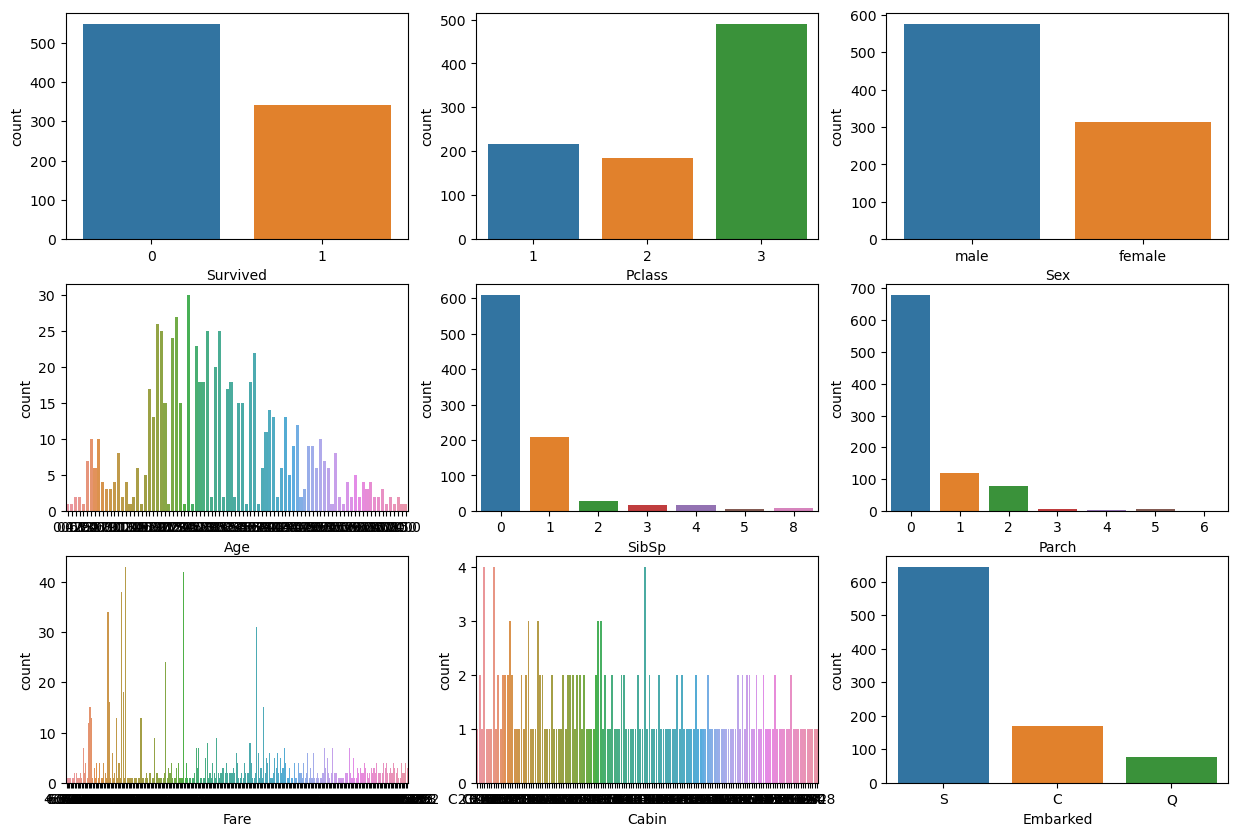

In [12]:
# Univariate Analysis
df=data[['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']]

plt.figure(figsize=(15,10))
plotnumber=1

for column in df:
    if plotnumber<=14:
        plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[column],data=df)
    plotnumber+=1
plt.show()

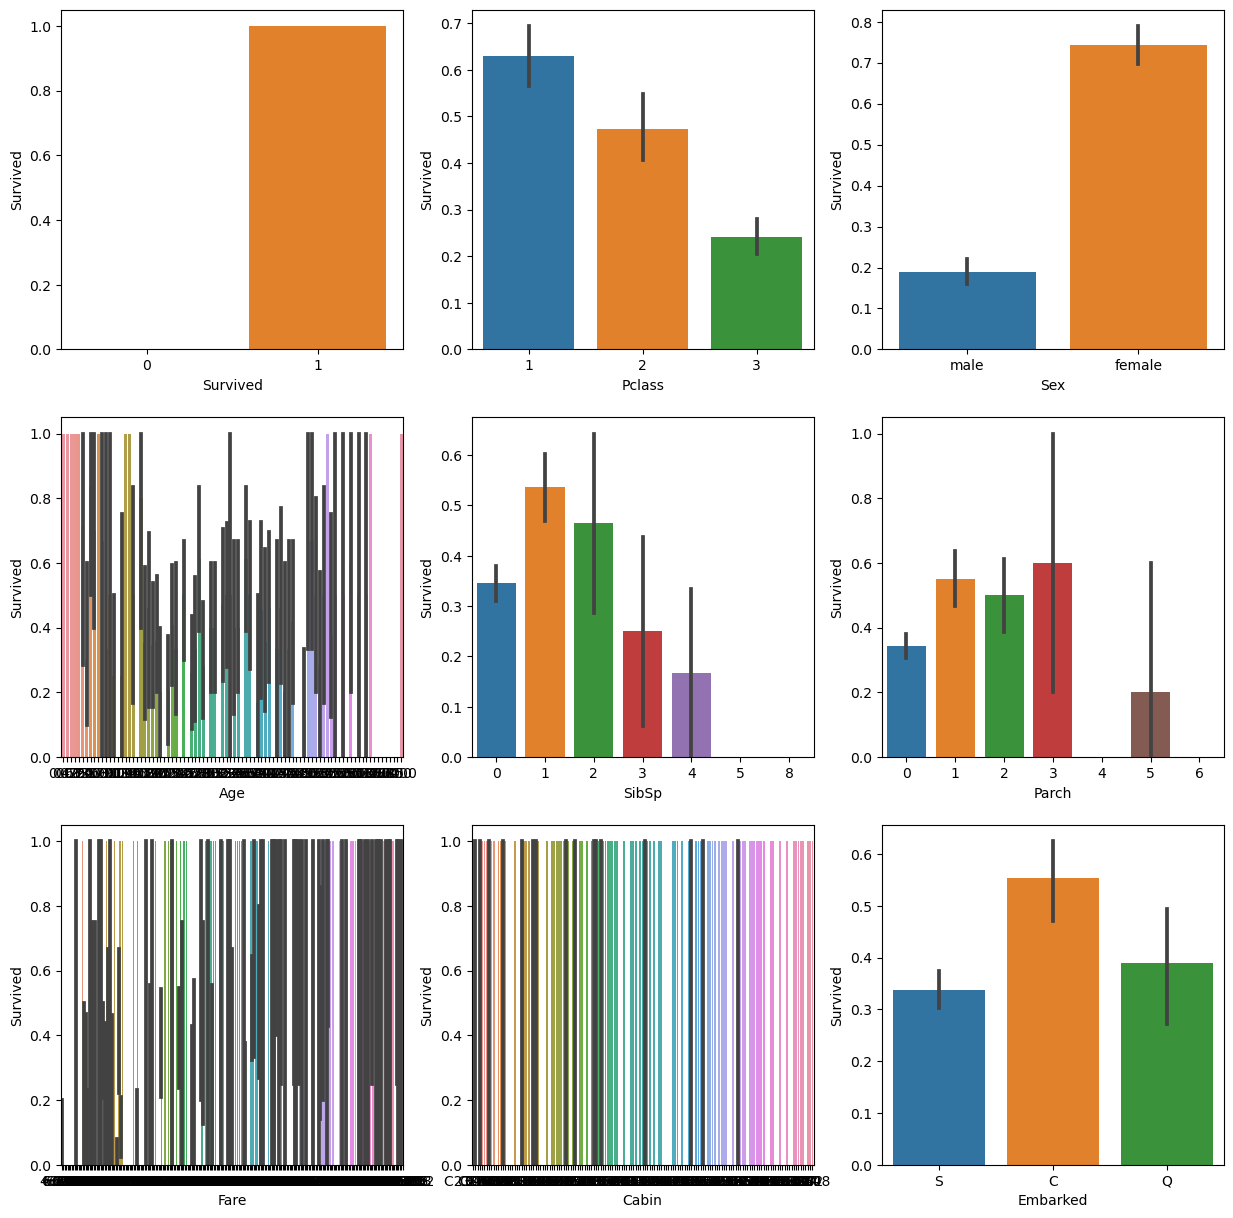

In [13]:
# Bivariate Analysis
df=data[['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']]

plt.figure(figsize=(15,15),facecolor='white')
plotno = 1 

for column in df:
    if plotno<=20: 
        plt.subplot(3,3,plotno) 
        sns.barplot(y='Survived',x=df[column],data=df)
        plotno+=1

plt.show()

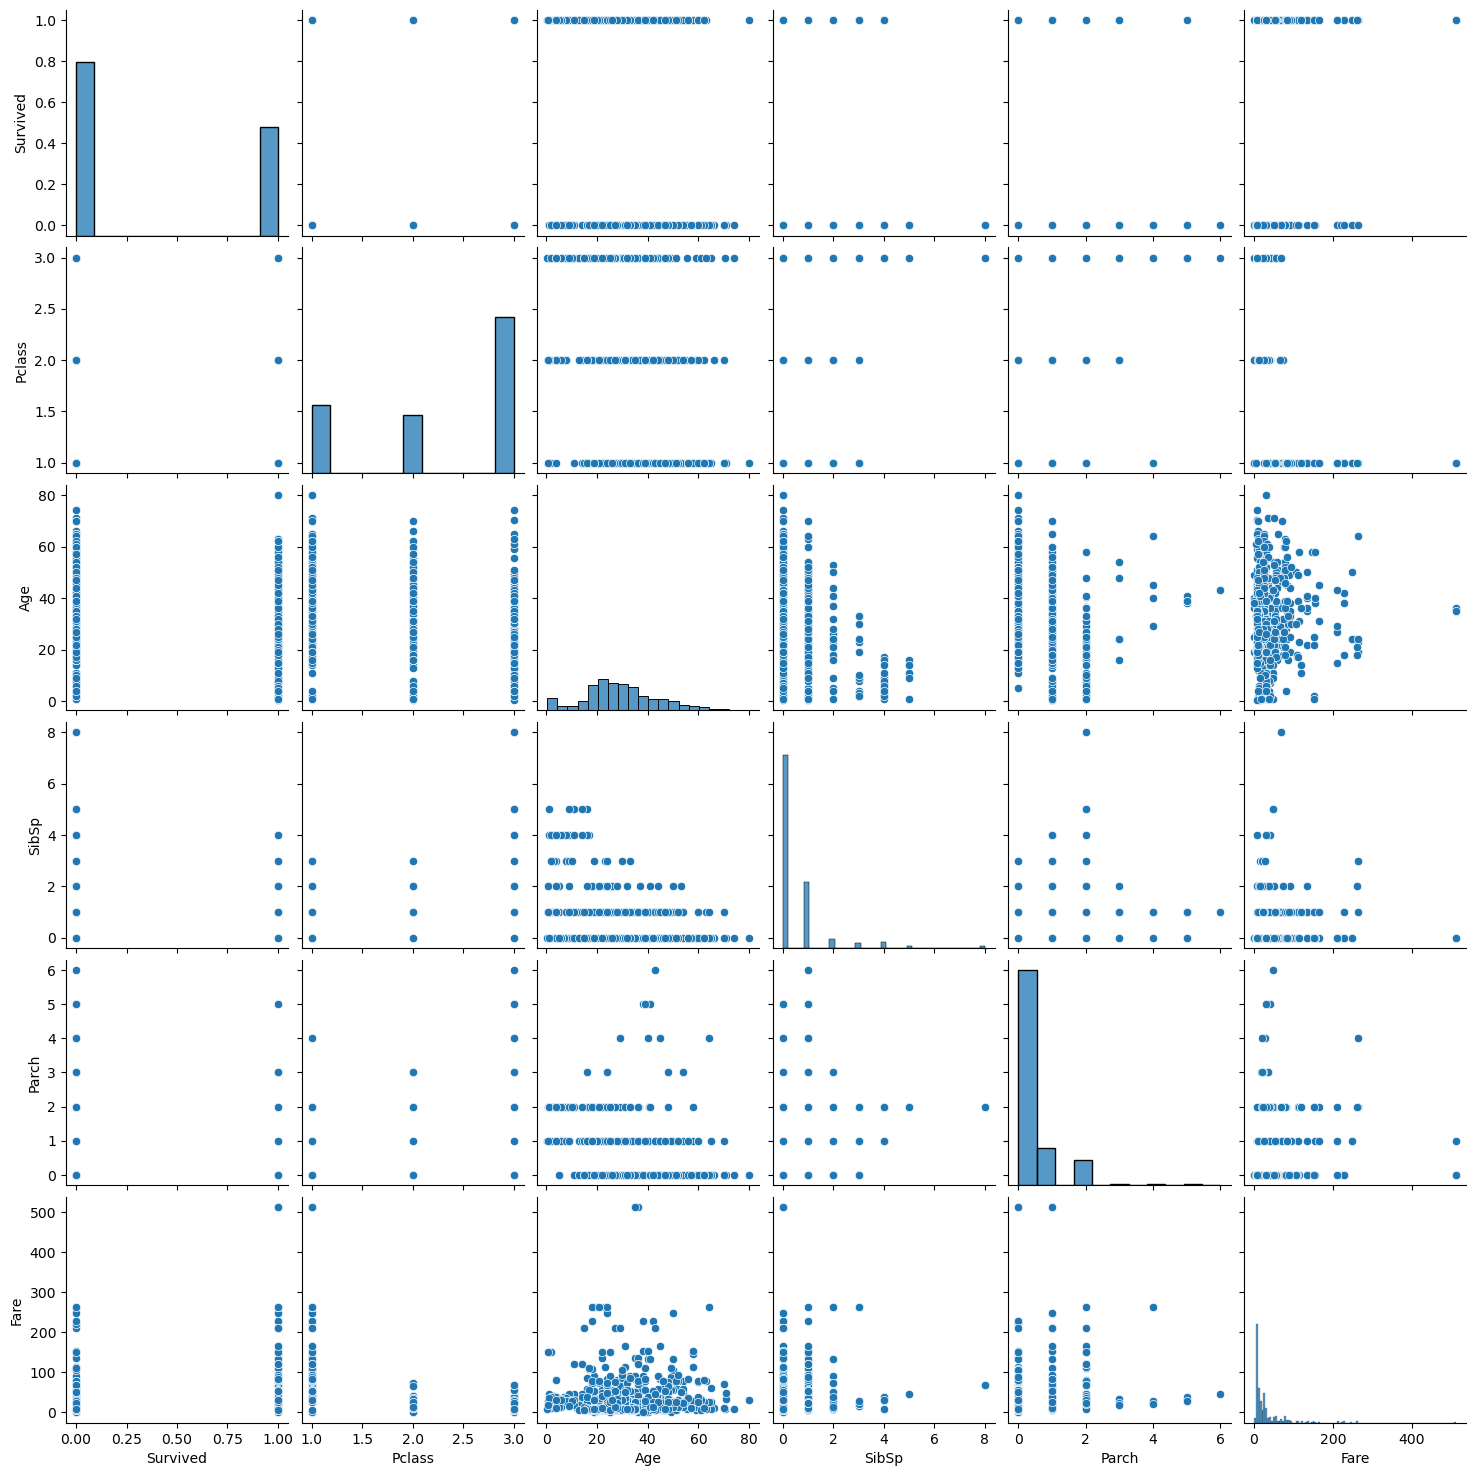

In [14]:
# Multivariate Analysis
sns.pairplot(df)

## Data Preprocessing & Feature Engineering

In [15]:
# Check missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
data['Age'].mean()

29.69911764705882

In [17]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [18]:
data['Embarked'].mode()[0]

'S'

In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [20]:
data.drop('Cabin',axis=1,inplace=True)

In [21]:
# After removal of missing values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
data.Sex.replace({'male':1,'female':0},inplace=True)

In [24]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
data.Embarked.replace({'S':2,'C':1,'Q':0},inplace=True)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature Selection

In [27]:
# Check redundent
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.638608
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:>

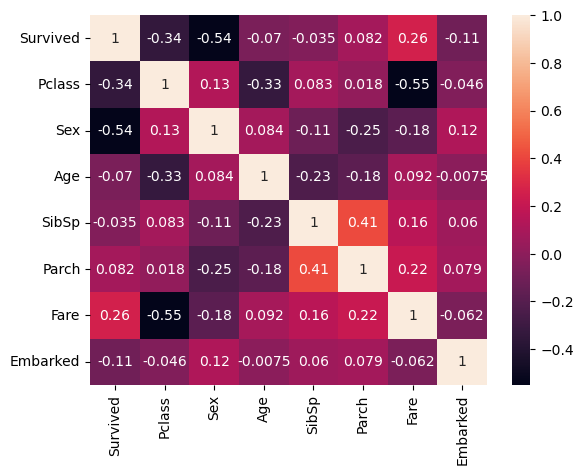

In [28]:
# Check correlation
df=data[['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
sns.heatmap(df.corr(),annot=True)

## Model Building

In [29]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [30]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
# Defining x & y
x = data.drop('Survived',axis=1)
y = data.Survived

In [32]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Accuracy Score : 0.7988826815642458
